Les modèles les plus stables ont 9 mots plus similaires de femme communs aux 10 entraînements aléatoires. Parmi les modèles les plus stables, on prend ceux qui ont le plus intégré l'entraînement de la bible, donc celui qui comprend le plus d'epoch d'entrainement sur la bible. 

On load le modèle déjà entraîné. 

In [1]:
from gensim.models import KeyedVectors

In [2]:
# Chemin vers votre modèle Word2Vec pré-entraîné
chemin_vers_modele = "model_stable.wordvec"

wv = KeyedVectors.load(chemin_vers_modele, mmap='r')

In [3]:
wv.most_similar('femme')

[('fille', 0.8295313119888306),
 ('servante', 0.7631155252456665),
 ('veuve', 0.6921671032905579),
 ('soeur', 0.6773770451545715),
 ('princesse', 0.664045512676239),
 ('nourrice', 0.6627954244613647),
 ('concubine', 0.6338983774185181),
 ('mere', 0.6251608729362488),
 ('maitresse', 0.6171490550041199),
 ('epouse', 0.6087170243263245)]

In [4]:
import PyPDF2

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        # Utilisez PdfReader à la place de PdfFileReader
        pdf_reader = PyPDF2.PdfReader(file)
        text = ''
        # Utilisez len(reader.pages) au lieu de reader.numPages
        for page_num in range(len(pdf_reader.pages)):
            if page_num % 100 == 0:
                print(f'Page {page_num}')
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
    return text

In [5]:
bible = extract_text_from_pdf('corpus_neutre_et_bible\Bible_de_Jerusalem_le_bon.pdf')
#on enlève le sommaire
bible_bon = bible[2488:]

Page 0
Page 100
Page 200
Page 300
Page 400
Page 500
Page 600
Page 700
Page 800
Page 900
Page 1000
Page 1100


In [9]:
import re

def remplacer_prenoms_femme(texte):
    # Liste de prénoms de femme
    prenoms_femme = ['Judith', 'Eve', 'Sara', 'Agar', 'Rebecca', 'Lea', 'Rachel', 'Tamar', 'Jezabel', 'Elizabeth', 'Rahab', 'Sheera', 'Yehosheeba', 'Esther', 'Jeanne', 'Salome', 'Debora', 'Yael', 'Dalila', 'Naomi', 'Ruth', 'Abigail', 'Bath-cheba', 'Myriam', 'Dina', 'Anne', 'Marie', 'Marthe']
    
    # Expression régulière pour rechercher les prénoms de femme
    regex_prenoms = r'\b(?:' + '|'.join(prenoms_femme) + r')\b'
    
    # Remplacer les prénoms de femme par le mot "femme"
    texte_modifie = re.sub(regex_prenoms, 'femme', texte, flags=re.IGNORECASE)
    
    return texte_modifie


In [10]:
bible_fini = remplacer_prenoms_femme(bible_bon)

In [6]:
from cluster2_FUNTION import rechercher_phrases_mots, data_matrix, kmedoids, reveal_cluster, elbow_method

In [10]:
phrase_maitresse = rechercher_phrases_mots(bible_bon, 'maitresse')

In [11]:
print(phrase_maitresse)

[]


In [12]:
phrase_princesse = rechercher_phrases_mots(bible_bon, 'princesse')
print(phrase_princesse)

[]


In [13]:
phrase_femme = rechercher_phrases_mots(bible_bon, 'femme')
print(len(phrase_femme))

565


On commence par **fille.**

302


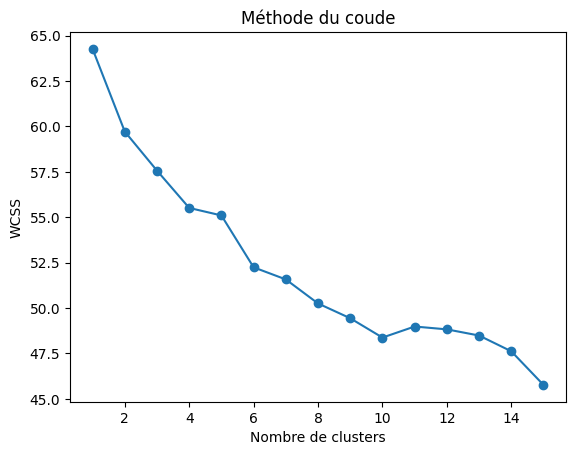

In [13]:
phrases_fille = rechercher_phrases_mots(bible_fini, 'fille')
print(len(phrases_fille))
data_fille = data_matrix(phrases_fille, wv)
elbow_method(15, data_fille)

On constate un changement de courbe pour k = 10. On clusterise donc avec 10 clusters.

In [127]:
cluster_fille, kmed_fille, data_fille = kmedoids(10, data_fille)

In [128]:
clust_fille, medoid_phrase_fille = reveal_cluster(cluster_fille, kmed_fille, phrases_fille)

On regarde **prostituée.**

24


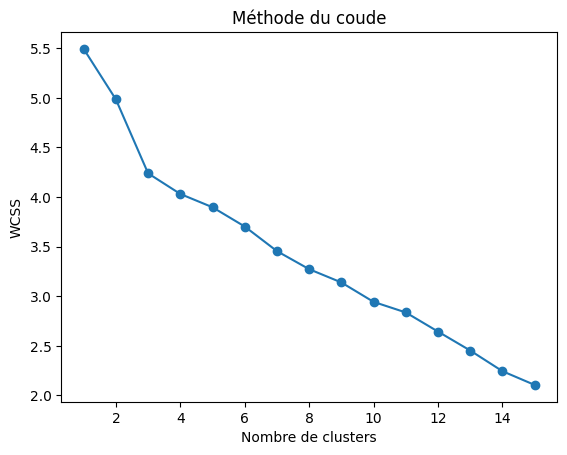

In [15]:
phrases_prostituee = rechercher_phrases_mots(bible_fini, 'prostituée')
print(len(phrases_prostituee))
data_prostituee = data_matrix(phrases_prostituee, wv)
elbow_method(15, data_prostituee)

Il faut 3 clusters.

In [130]:
cluster_prost, kmed_prost, data_prost = kmedoids(3, data_prostituee)
clust_prost, medoid_phrase_prost = reveal_cluster(cluster_prost, kmed_prost, phrases_prostituee)

In [131]:
print(medoid_phrase_prost)

["Jérémie 2, 37 De là aussi tu devras sortir les mains sur la tête, car Yahvé a rejeté ceux auxquels tu te fies, tu n'auras pas de chance avec eux! Jérémie 3, 1 Si un homme répudie sa femme, et que celle-ci le quitte et appartient à un autre, a-t-il encore le droit de revenir à elle? N'est-elle pas totalement profanée, cette terre-là? Et toi qui t'es prostituée à de nombreux amants, tu prétends revenir à moi! Oracle de Yahvé", 'Genèse 38, 21 Il demanda aux gens du lieu: "Où est cette prostituée qui était à Enayim, sur le chemin?" Mais ils répondirent: "Il n\'y a jamais eu là de prostituée!" Genèse 38, 22 Il revint donc auprès de Juda et dit: "Je ne l\'ai pas retrouvée', "Ezéchiel 16, 26 Tu t'es prostituée chez les Egyptiens, tes voisins au corps puissant, tu as multiplié tes prostitutions pour m'irriter"]


In [132]:
reveal_cluster(cluster_prost, kmed_prost, phrases_prostituee)

(array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0,
        1, 1], dtype=int64),
 ["Jérémie 2, 37 De là aussi tu devras sortir les mains sur la tête, car Yahvé a rejeté ceux auxquels tu te fies, tu n'auras pas de chance avec eux! Jérémie 3, 1 Si un homme répudie sa femme, et que celle-ci le quitte et appartient à un autre, a-t-il encore le droit de revenir à elle? N'est-elle pas totalement profanée, cette terre-là? Et toi qui t'es prostituée à de nombreux amants, tu prétends revenir à moi! Oracle de Yahvé",
  'Genèse 38, 21 Il demanda aux gens du lieu: "Où est cette prostituée qui était à Enayim, sur le chemin?" Mais ils répondirent: "Il n\'y a jamais eu là de prostituée!" Genèse 38, 22 Il revint donc auprès de Juda et dit: "Je ne l\'ai pas retrouvée',
  "Ezéchiel 16, 26 Tu t'es prostituée chez les Egyptiens, tes voisins au corps puissant, tu as multiplié tes prostitutions pour m'irriter"])

In [26]:
import numpy as np

In [27]:
def print_all_cluster(labels, passages_cooccurrence, n_clusters):
    for i in range(n_clusters):
        indices = np.where(labels == i)[0]
        print(indices)
        print(f"Cluster {i} :")
        for idx in indices:
            print(passages_cooccurrence[idx])
        print('')

In [28]:
print(clust_prost)

NameError: name 'clust_prost' is not defined

In [136]:
print_all_cluster(cluster_prost, phrases_prostituee, 3)

[ 2  4  9 10 11 12 13 14 19 21]
Cluster 0 :
Lévitique 21, 7 Ils ne prendront pas pour épouse une femme prostituée et profanée, ni une femme que son mari a chassée, car le prêtre est consacré à son Dieu
Deutéronome 23, 19 Tu n'apporteras pas à la maison de Yahvé ton Dieu le salaire d'une prostituée ni le paiement d'un chien, quel que soit le voeu que tu aies fait: car tous deux sont en abomination à Yahvé ton Dieu
Proverbes 6, 25 Ne convoite pas dans ton coeur sa beauté, ne te laisse pas prendre à ses oeillades, Proverbes 6, 26 car à la prostituée suffit un quignon de pain, mais la femme mariée en veut à une vie précieuse
Mais au bout de 70 ans, il en sera de Tyr comme dans la chanson de la prostituée: Isaïe 23, 16 "Prends une cithare, parcours la ville, prostituée délaissée! Joue de ton mieux, répète ta chanson, qu'on se souvienne de toi!" Isaïe 23, 17 Et il arrivera, au bout de 70 ans, que Yahvé visitera Tyr
Isaïe 57, 3 Quant à vous, approchez ici, fils de la magicienne, race adultère

On regarde **servante**.

76


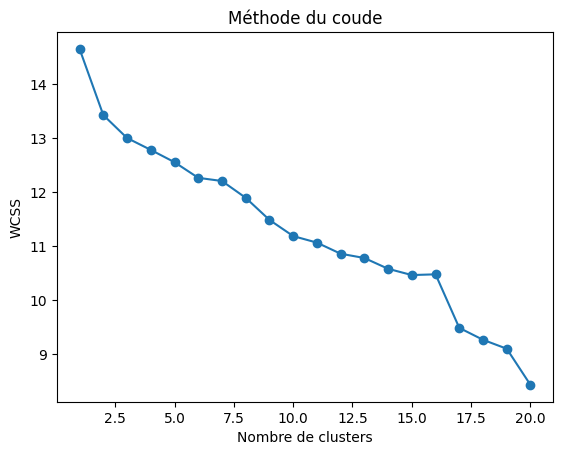

In [17]:
phrases_servante = rechercher_phrases_mots(bible_fini, 'servante')
print(len(phrases_servante))
data_servante = data_matrix(phrases_servante, wv)
elbow_method(20, data_servante)

Nombre de cluster = 16. 

In [138]:
cluster_servante, kmed_servante, data_servante = kmedoids(16, data_servante)
clust_serv, medoid_phrase_servante = reveal_cluster(cluster_servante, kmed_servante, phrases_servante)

In [139]:
print(medoid_phrase_servante)

['Luc 22, 56 Une servante le vit assis près de la flambée et, fixant les yeux sur lui, elle dit: "Celui-là aussi était avec lui!" Luc 22, 57 Mais lui nia en disant: "Femme, je ne le connais pas', '1 Samuel 25, 24 Se jetant à ses pieds, elle dit: "Que la faute soit sur moi, Monseigneur! Puisse ta servante parler à tes oreilles et daigne écouter les paroles de ta servante! 1 Samuel 25, 25 Que Monseigneur ne fasse pas attention à ce vaurien, à ce Nabal, car il porte bien son nom: il s\'appelle La Brute et vraiment il est abruti', '1 Samuel 1, 11 Elle fit ce voeu: "O Yahvé Sabaot! Si tu voulais considérer la misère de ta servante, te souvenir de moi, ne pas oublier ta servante et lui donner un petit d\'homme, alors je le donnerai à Yahvé pour toute sa vie et le rasoir ne passera pas sur sa tête', '"  2 Rois 4, 2 Elisée lui dit: "Que puis-je faire pour toi? Dis-moi, qu\'as-tu à la maison?" Elle répondit: "Ta servante n\'a rien du tout à la maison, sauf un flacon d\'huile', 'Et la servante d

On regarde **veuve**.

42


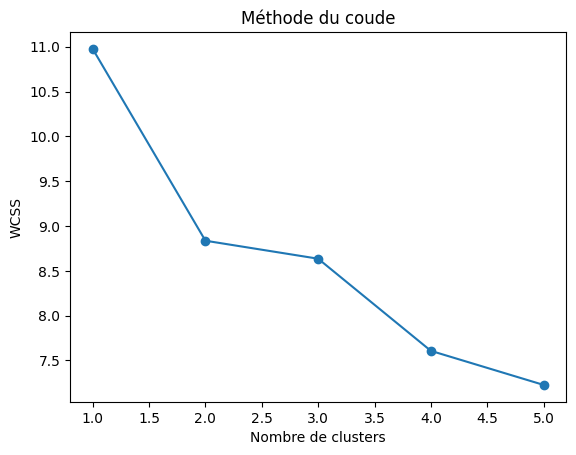

In [18]:
phrases_veuve = rechercher_phrases_mots(bible_fini, 'veuve')
print(len(phrases_veuve))
data_veuve = data_matrix(phrases_veuve, wv)
elbow_method(5, data_veuve)

In [19]:
print(phrases_veuve)

['Genèse 38, 11 Alors Juda dit à sa belle-fille femme: "Retourne comme veuve chez ton père, en attendant que grandisse mon fils Shéla', 'Genèse 38, 19 Elle se leva, partit, enleva son voile et reprit ses vêtements de veuve', 'Exode 22, 21 Vous ne maltraiterez pas une veuve ni un orphelin', "Lévitique 22, 12 Si la fille d'un prêtre est devenue l'épouse d'un laïc, elle ne peut manger des prélèvements sacrés; Lévitique 22, 13 mais si elle est devenue veuve ou a été répudiée et que, n'ayant pas d'enfant, elle ait dû retourner à la maison de son père comme au temps de sa jeunesse, elle mangera de la nourriture de son père", "Nombres 30, 10 Le voeu d'une femme veuve ou répudiée, et tous les engagements qu'elle a pris, seront valides pour elle", "Deutéronome 14, 29 Viendront alors manger le lévite (puisqu'il n'a ni part ni héritage avec toi), l'étranger, l'orphelin et la veuve de ta ville, et ils s'en rassasieront", "Deutéronome 16, 11 En présence de Yahvé ton Dieu tu te réjouiras, au lieu ch

Nb de clusters = 2.

In [141]:
cluster_veuve, kmed_veuve, data_veuve = kmedoids(2, data_veuve)
clust_veuve, medoid_phrase_veuve = reveal_cluster(cluster_veuve, kmed_veuve, phrases_veuve)

In [142]:
print(medoid_phrase_veuve)

["Deutéronome 14, 29 Viendront alors manger le lévite (puisqu'il n'a ni part ni héritage avec toi), l'étranger, l'orphelin et la veuve de ta ville, et ils s'en rassasieront", 'femme 4, 9 Booz dit aux anciens et à tout le peuple: "Vous êtes témoins aujourd\'hui que j\'acquiers de la main de Noémi tout ce qui appartenait à Elimélek et tout ce qui appartenait à Mahlôn et à Kilyôn, femme 4, 10 et que j\'acquiers en même temps pour femme femme la Moabite, veuve de Mahlôn, pour perpétuer le nom du mort sur son héritage et pour que le nom du mort ne soit pas retranché d\'entre ses frères ni de la porte de sa ville']


On passe à **épouse**.

23


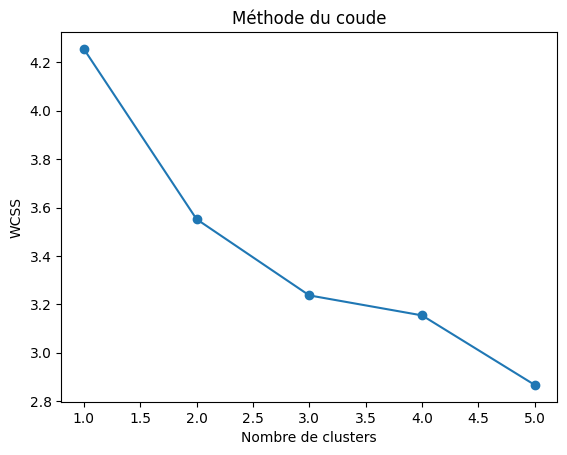

In [20]:
phrases_epouse = rechercher_phrases_mots(bible_fini, 'épouse')
print(len(phrases_epouse))
data_epouse = data_matrix(phrases_epouse, wv)
elbow_method(5, data_epouse)

Nb clusters = 3.

In [144]:
cluster_epouse, kmed_epouse, data_epouse = kmedoids(3, data_epouse)
clust_epouse, medoid_phrase_epouse = reveal_cluster(cluster_epouse, kmed_epouse, phrases_epouse)

In [145]:
print(medoid_phrase_epouse)

['Lévitique 21, 7 Ils ne prendront pas pour épouse une femme prostituée et profanée, ni une femme que son mari a chassée, car le prêtre est consacré à son Dieu', 'Matthieu 19, 9 Or je vous le dis: quiconque répudie sa femme - pas pour "prostitution" - et en épouse une autre, commet un adultère', 'Deutéronome 22, 13 Si un homme épouse une femme, s\'unit à elle et ensuite la prend en aversion, Deutéronome 22, 14 et qu\'il lui impute alors des fautes et la diffame publiquement en disant: "Cette femme que j\'ai épousée et dont je me suis approché, je ne lui ai pas trouvé les signes de la virginité", Deutéronome 22, 15 le père de la jeune femme et sa mère prendront les signes de sa virginité et les produiront devant les anciens de la ville, à la porte']


In [146]:
print_all_cluster(cluster_epouse, phrases_epouse, 4)

[ 2  3  4  6  8 10 14 15 17 21]
Cluster 0 :
Lévitique 20, 21 L'homme qui prend pour épouse la femme de son frère: c'est une souillure, il a découvert la nudité de son frère, ils mourront sans enfant
Lévitique 21, 7 Ils ne prendront pas pour épouse une femme prostituée et profanée, ni une femme que son mari a chassée, car le prêtre est consacré à son Dieu
Lévitique 21, 13 Il prendra pour épouse une femme encore vierge
Son "lévir" viendra à elle, il exercera son lévirat en la prenant pour épouse Deutéronome 25, 6 et le premier-né qu'elle enfantera relèvera le nom de son frère défunt; ainsi son nom ne sera pas effacé d'Israël
Il avait un serviteur égyptien dénommé Yarha, 1 Chroniques 2, 35 auquel Shéshân donna sa fille pour épouse
" Tobie 10, 10 sur-le-champ, Ragouël lui remit son épouse Sarra
Ecclésiastique 9, 1 Ne sois pas jaloux de ton épouse bien-aimée et ne lui donne pas l'idée de te faire du mal
Ecclésiastique 15, 2 Elle vient au-devant de lui comme une mère, comme une épouse vierge

On passe à **concubine**.

18


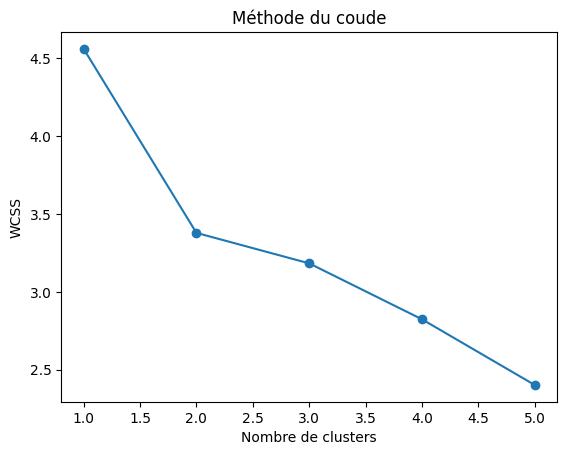

In [147]:
phrases_concubine = rechercher_phrases_mots(bible_fini, 'concubine')
print(len(phrases_concubine))
data_concubine = data_matrix(phrases_concubine, wv)
elbow_method(5, data_concubine)

Nb clusters = 2. Mais comme 18 phrases, pas vraiment besoin de clusters.

In [148]:
print(phrases_concubine)

["Genèse 35, 22 Pendant qu'Israël habitait dans cette région, Ruben alla coucher avec Bilha, la concubine de son père, et Israël l'apprit", "Genèse 36, 12 Eliphaz, fils d'Esaü, eut pour concubine Timna et elle lui enfanta Amaleq", "Lévitique 19, 20 Si un homme couche maritalement avec une femme, si celle-ci est la servante concubine d'un homme auquel elle n'a pas été rachetée et qui ne lui a pas donné sa liberté, le premier sera passible d'un droit mais ils ne mourront pas, car elle n'était pas libre", "Juges 8, 31 Sa concubine qui résidait à Sichem lui enfanta, elle aussi, un fils, auquel il donna le nom d'Abimélek", 'Il prit pour concubine une femme de Bethléem de Juda', 'Juges 19, 2 Dans un moment de colère sa concubine le quitta pour rentrer dans la maison de son père à Bethléem de Juda, et elle y demeura un certain temps, quatre mois', 'Juges 19, 9 Le mari se levait pour partir avec sa concubine et son serviteur, quand son beau-père, le père de la jeune femme, lui fit: "Voici que 

On passe à **mère**.

224


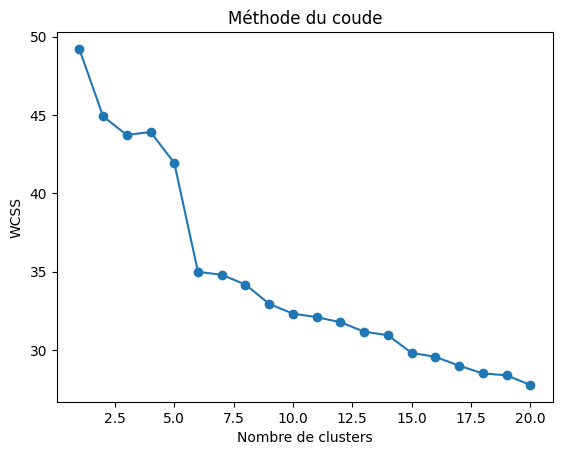

In [22]:
phrases_mere = rechercher_phrases_mots(bible_fini, 'mère')
print(len(phrases_mere))
data_mere = data_matrix(phrases_mere, wv)
elbow_method(20, data_mere)

Nb clusters = 5 ???

In [23]:
cluster_mere, kmed_mere, data_mere = kmedoids(5, data_mere)
clust_mere, medoid_phrase_mere = reveal_cluster(cluster_mere, kmed_mere, phrases_mere)

In [24]:
print(medoid_phrase_mere)

["Matthieu 10, 35 Car je suis venu opposer l'homme à son père, la fille à sa mère et la bru à sa belle-mère: Matthieu 10, 36 on aura pour ennemis les gens de sa famille", '" Genèse 37, 10 Il raconta cela à son père et à ses frères, mais son père le gronda et lui dit: "En voilà un rêve que tu as fait!Allons-nous donc, moi, ta mère et tes frères, venir nous prosterner à terre devant toi?" Genèse 37, 11 Ses frères furent jaloux de lui, mais son père gardait la chose dans sa mémoire', 'Désormais ne bois ni vin, ni boisson fermentée, et ne mange rien d\'impur, car l\'enfant sera nazir de Dieu depuis le sein de sa mère jusqu\'au jour de sa mort!" Juges 13, 8 Alors Manoah implora Yahvé et dit: "Je t\'en prie, Seigneur! Que l\'homme de Dieu que tu as envoyé vienne encore une fois vers nous, et qu\'il nous apprenne ce que nous aurons à faire à l\'enfant lorsqu\'il sera né!" Juges 13, 9 Dieu exauça Manoah et l\'Ange de Dieu vint de nouveau trouver la femme, alors qu\'elle était assise dans la ca

In [29]:
print_all_cluster(cluster_mere, phrases_mere, 5)

[  0   1   2  12  17  18  19  24  25  27  37  47  49  52  62  64  65  66
  67  69  72  73  74  75  76  77  81  82  84  85  87  88  89  90  92  93
  94  95  96  97  98 100 108 114 115 121 124 125 126 129 131 132 138 140
 141 160 164 171 177 179 186 188 196 206 207 214]
Cluster 0 :
Genèse 2, 23 Alors celui-ci s'écria: "Pour le coup, c'est l'os de mes os et la chair de ma chair! Celle-ci sera appelée "femme", car elle fut tirée de l'homme, celle-ci!" Genèse 2, 24 C’est pourquoi l'homme quitte son père et sa mère et s'attache à sa femme, et ils deviennent une seule chair
" Genèse 3, 20 L'homme appela sa femme "femme", parce qu'elle fut la mère de tous les vivants
Genèse 21, 21 Il demeura au désert de Parân et sa mère lui choisit une femme du pays d'Egypte
" Genèse 28, 7 Et Jacob avait obéi à son père et à sa mère et était parti en Paddân-Aram
La jeune fille alla donc chercher la mère de l'enfant
Exode 21, 15 Qui frappe son père ou sa mère sera mis à mort
Exode 21, 17 Qui maudit son père ou

On passe à **nourrice**.

4


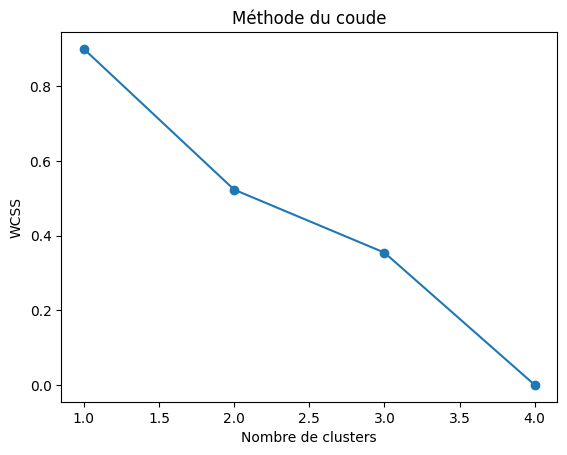

In [30]:
phrases_nourrice = rechercher_phrases_mots(bible_fini, 'nourrice')
print(len(phrases_nourrice))
data_nourrice = data_matrix(phrases_nourrice, wv)
elbow_method(4, data_nourrice)

In [31]:
print(phrases_nourrice)

["Genèse 35, 8 Alors mourut Débora, la nourrice de Rébecca, et elle fut ensevelie au-dessous de Béthel, sous le chêne; aussi l'appela-t-on le Chêne-des-Pleurs", '" Exode 2, 7 La soeur de l\'enfant dit alors à la fille de Pharaon: "Veux-tu que j\'aille te chercher, parmi les femmes des Hébreux, une nourrice qui te nourrira cet enfant? -- Exode 2, 8 Va", lui répondit la fille de Pharaon', 'Moïse en fut très affecté, Nombres 11, 11 et il dit à Yahvé: "Pourquoi fais-tu du mal à ton serviteur? Pourquoi n\'ai-je pas trouvé grâce à tes yeux, que tu m\'aies imposé la charge de tout ce peuple? Nombres 11, 12 Est-ce moi qui ai conçu tout ce peuple, est-ce moi qui l\'ai enfanté, que tu me dises: Porte-le sur ton sein, comme la nourrice porte l\'enfant à la mamelle, au pays que j\'ai promis par serment à ses pères? Nombres 11, 13 Où trouverais-je de la viande à donner à tout ce peuple, quand ils m\'obsèdent de leurs larmes en disant: Donne-nous de la viande à manger? Nombres 11, 14 Je ne puis, à m

On passe à **princesse**. 

In [154]:
phrases_princesse = rechercher_phrases_mots(bible_fini, 'princesse')
print(len(phrases_princesse))

0


Pas d'occurence de **princesse** dans la bible. 

On passe à **maitresse**. 

In [155]:
phrases_maitresse = rechercher_phrases_mots(bible_fini, 'maitresse')
print(len(phrases_maitresse))

0


Pas d'occurence de **maitresse** dans la bible. 

On passe à **soeur**.

62


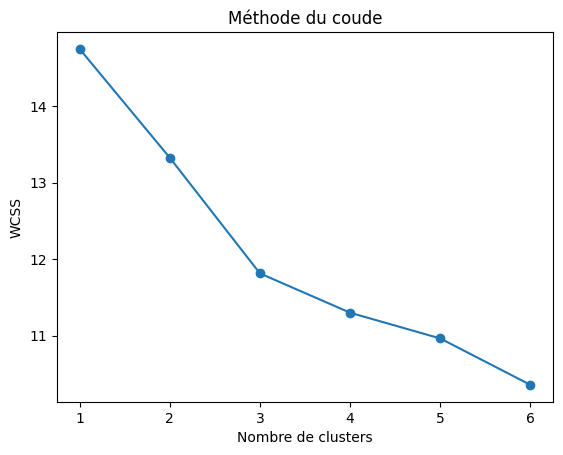

In [33]:
phrases_soeur = rechercher_phrases_mots(bible_fini, 'soeur')
print(len(phrases_soeur))
data_soeur = data_matrix(phrases_soeur, wv)
elbow_method(6, data_soeur)

In [34]:
print(phrases_soeur)

["Exode 2, 4 La soeur de l'enfant se posta à distance pour voir ce qui lui adviendrait", '" Exode 2, 7 La soeur de l\'enfant dit alors à la fille de Pharaon: "Veux-tu que j\'aille te chercher, parmi les femmes des Hébreux, une nourrice qui te nourrira cet enfant? -- Exode 2, 8 Va", lui répondit la fille de Pharaon', "Exode 6, 23 Aaron épousa Elishéba, fille d'Amminadab, soeur de Nahshôn, et elle lui donna Nadab, Abihu, Eléazar et Itamar", "Exode 15, 20 Miryam, la prophétesse, soeur d'Aaron, prit en main un tambourin et toutes les femmes la suivirent avec des tambourins, formant des choeurs de danses", "Lévitique 18, 12 Tu ne découvriras pas la nudité de la soeur de ton père, car c'est la chair de ton père", "Lévitique 18, 13 Tu ne découvriras pas la nudité de la soeur de ta mère, car c'est la chair même de ta mère", 'Lévitique 18, 18 Tu ne prendras pas pour ton harem une femme en même temps que sa soeur en découvrant la nudité de celle-ci du vivant de sa soeur', 'Ils seront exterminés 

In [157]:
cluster_soeur, kmed_soeur, data_soeur = kmedoids(3, data_soeur)
clust_soeur, medoid_phrase_soeur = reveal_cluster(cluster_soeur, kmed_soeur, phrases_soeur)

In [158]:
print(medoid_phrase_soeur)

['2 Samuel 13, 32 Mais Yonadab, le fils de Shiméa, frère de David, prit ainsi la parole: "Que Monseigneur ne dise pas qu\'on a fait périr tous les jeunes gens, les fils du roi, car seul Amnon est mort: Absalom s\'était promis cela depuis le jour où Amnon avait outragé sa soeur femme', "Lévitique 18, 12 Tu ne découvriras pas la nudité de la soeur de ton père, car c'est la chair de ton père", '2 Samuel 13, 2 Amnon était tourmenté au point de se rendre malade à cause de sa soeur femme, car elle était vierge et Amnon ne voyait pas la possibilité de lui rien faire']


On regarde vierge. 

29


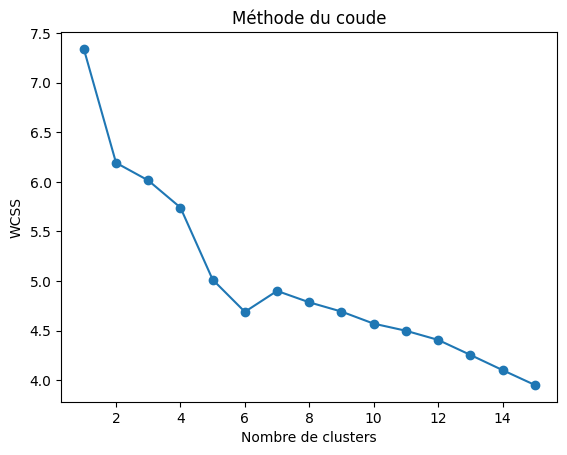

In [35]:
phrases_vierge = rechercher_phrases_mots(bible_fini, 'vierge')
print(len(phrases_vierge))
data_vierge = data_matrix(phrases_vierge, wv)
elbow_method(15, data_vierge)

In [36]:
print(phrases_vierge)

['Exode 22, 15 "Si quelqu\'un séduit une vierge non encore fiancée et couche avec elle, il versera le prix et la prendra pour femme', "Lévitique 21, 3 Pour sa soeur vierge qui reste sa proche parente puisqu'elle n'a pas appartenu à un homme, il pourra se rendre impur; Lévitique 21, 4 pour une femme mariée parmi les siens, il ne se rendra pas impur: il se profanerait", 'Lévitique 21, 13 Il prendra pour épouse une femme encore vierge', "Lévitique 21, 14 La veuve, la femme répudiée ou profanée par la prostitution, il ne les prendra pas pour épouses; c'est seulement une vierge d'entre les siens qu'il prendra pour épouse:  Lévitique 21, 15 il ne profanera point sa descendance, car c'est moi, Yahvé, qui l'ai sanctifiée", "Nombres 28, 4 Tu feras du premier agneau l'holocauste du matin et du second l'holocauste du crépuscule, Nombres 28, 5 avec l'oblation d'un dixième de mesure de fleur de farine pétrie dans un quart de setier d'huile vierge", "Deutéronome 22, 18 Les anciens de cette cité se s

In [40]:
phrases_sterile = rechercher_phrases_mots(bible_fini, 'stérile')
print(len(phrases_sterile))
#data_vierge = data_matrix(phrases_vierge, wv)
#elbow_method(15, data_vierge)

16


In [41]:
print(phrases_sterile)

["Genèse 20, 18 Car Yahvé avait rendu stérile le sein de toutes les femmes dans la maison d'Abimélek, à cause de femme, la femme d'Abraham", "Genèse 29, 31 Yahvé vit que Léa n'était pas aimée et il la rendit féconde, tandis que femme demeurait stérile", "Exode 23, 26 Nulle femme dans ton pays n'avortera ou ne sera stérile et je laisserai s'achever le nombre de tes jours", "Sa femme était stérile et n'avait pas eu d'enfant", 'Juges 13, 3 L\'Ange de Yahvé apparut à cette femme et lui dit: "Tu es stérile et tu n\'as pas eu d\'enfant Juges 13, 4 mais tu vas concevoir et tu enfanteras un fils', "-- Il avait coutume de donner des portions à sa femme Peninna et à tous ses fils et filles,  1 Samuel 1, 5 et il n'en donnait qu'une à femme bien qu'il préférât femme, mais Yahvé l'avait rendue stérile", '1 Samuel 1, 6 Sa rivale lui faisait aussi des affronts pour la mettre en colère, parce que Yahvé avait rendu son sein stérile', 'La femme stérile enfante sept fois, mais la mère de nombreux enfants

88


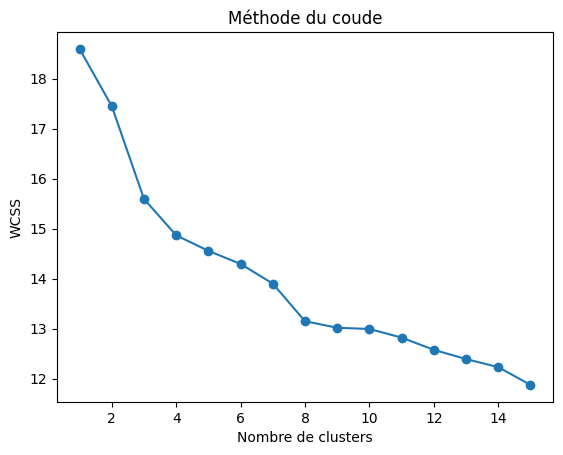

In [43]:
phrases_mari = rechercher_phrases_mots(bible_fini, 'mari')
print(len(phrases_mari))
data_mari = data_matrix(phrases_mari, wv)
elbow_method(15, data_mari)

In [44]:
cluster_mari, kmed_mari, data_mari = kmedoids(8, data_mari)
clust_mari, medoid_phrase_mari = reveal_cluster(cluster_mari, kmed_mari, phrases_mari)

In [45]:
print(medoid_phrase_mari)

['Lévitique 21, 7 Ils ne prendront pas pour épouse une femme prostituée et profanée, ni une femme que son mari a chassée, car le prêtre est consacré à son Dieu', '1 Corinthiens 7, 4 La femme ne dispose pas de son corps, mais le mari', "1 Corinthiens 7, 39 La femme demeure liée à son mari aussi longtemps qu'il vit; mais si le mari meurt, elle est libre d'épouser qui elle veut, dans le Seigneur seulement", "1 Corinthiens 7, 10 Quant aux personnes mariées, voici ce que je prescris, non pas moi, mais le Seigneur: que la femme ne se sépare pas de son mari -- 1 Corinthiens 7, 11 au cas où elle s'en séparerait, qu'elle ne se remarie pas ou qu'elle se réconcilie avec son mari - et que le mari ne répudie pas sa femme", 'Ephésiens 5, 33 Bref, en ce qui vous concerne, que chacun aime sa femme comme soi-même, et que la femme révère son mari', "femme 16, 22 Beaucoup la demandèrent en mariage, mais elle ne connut point d'homme tous les jours de sa vie depuis que son mari Manassé était mort et avait

In [46]:
phrases_descendance = rechercher_phrases_mots(bible_fini, 'descendance')
print(len(phrases_descendance))
# data_mari = data_matrix(phrases_mari, wv)
# elbow_method(15, data_mari)

57


In [48]:
print(phrases_descendance)

["Genèse 5, 1 Voici le livret de la descendance d'Adam: Le jour où Dieu créa Adam, il le fit à la ressemblance de Dieu", 'Genèse 10, 1 Voici la descendance des fils de Noé, Sem, Cham et Japhet, auxquels des fils naquirent après le déluge: Genèse 10, 2 Fils de Japhet: Gomer, Magog, les Mèdes, Yavân, Tubal, Moshek, Tiras', "Genèse 10, 21 Une descendance naquit également à Sem, l'ancêtre de tous les fils de Eber et le frère aîné de Japhet", 'Genèse 11, 10 Voici la descendance de Sem: Quand Sem eut cent ans, il engendra Arpakshad, deux ans après le déluge', 'Genèse 11, 27 Voici la descendance de Térah: Térah engendra Abram, Nahor et Harân', '" Genèse 15, 3 Abram dit: "Voici que tu ne m\'as pas donné de descendance et qu\'un des gens de ma maison héritera de moi', 'Genèse 19, 32 Viens, faisons boire du vin à notre père et couchons avec lui; ainsi, de notre père, nous susciterons une descendance', 'Genèse 19, 34 Le lendemain, l\'aînée dit à la cadette: "La nuit dernière, j\'ai couché avec mo

188


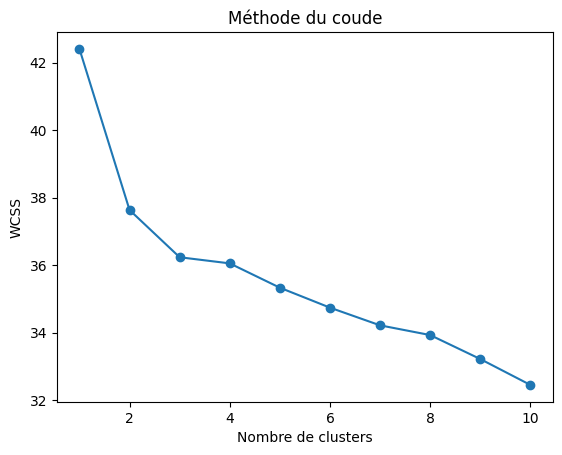

In [51]:
phrases_chair= rechercher_phrases_mots(bible_fini, 'chair')
print(len(phrases_chair))
data_chair = data_matrix(phrases_chair, wv)
elbow_method(10, data_chair)

3 clusters ! 

In [52]:
cluster_chair, kmed_chair, data_chair = kmedoids(3, data_chair)
clust_chair, medoid_phrase_chair = reveal_cluster(cluster_chair, kmed_chair, phrases_chair)

In [53]:
print(medoid_phrase_chair)

["Michée 3, 1 Puis je dis: Ecoutez donc, chefs de la maison de Jacob et commandants de la maison d'Israël! N'est- ce pas à vous de connaître le droit, Michée 3, 2 vous qui haïssez le bien et aimez le mal, (qui leur arrachez la peau, et la chair de sur leurs os)! Michée 3, 3 Ceux qui ont dévoré la chair de mon peuple, et lui ont arraché la peau et brisé les os, qui l'ont déchiré comme chair dans la marmite et comme viande en plein chaudron,  Michée 3, 4 alors, ils crieront vers Yahvé, mais il ne leur répondra pas", "Malachie 2, 15 N'a-t-il pas fait un seul être, qui a chair et souffle de vie? Et cet être unique, que cherche-t-il? Une postérité donnée par Dieu! Respect donc à votre vie, et la femme de ta jeunesse, ne la trahis point! Malachie 2, 16 Car je hais la répudiation, dit Yahvé le Dieu d'Israël, et qu'on recouvre l'injustice de son vêtement, dit Yahvé Sabaot", "Baruch 2, 1 Aussi le Seigneur a-t-il accompli la parole qu'il avait prononcée contre nous, contre nos juges qui gouvernè

In [54]:
phrases_adultere= rechercher_phrases_mots(bible_fini, 'adultère')
print(len(phrases_adultere))
#data_chair = data_matrix(phrases_chair, wv)
#elbow_method(10, data_chair)

11


In [55]:
print(phrases_adultere)

['Sagesse 14, 25 Partout, pêle-mêle, sang et meurtre, vol et fourberie, corruption, déloyauté, trouble, parjure, Sagesse 14, 26 confusion des gens de bien, oubli des bienfaits, souillure des âmes, crimes contre nature, désordres dans le mariage, adultère et débauche', "Ecclésiastique 25, 2 Il est trois sortes de gens que hait mon âme, et dont l'existence me met hors de moi: un pauvre gonflé d'orgueil, un riche menteur, un vieillard adultère et dénué de sens", "Isaïe 57, 3 Quant à vous, approchez ici, fils de la magicienne, race adultère qui t'es prostituée", "Osée 4, 1 Ecoutez la parole de Yahvé, enfants d'Israël, car Yahvé est en procès avec les habitants du pays: il n'y a ni fidélité ni amour, ni connaissance de Dieu dans le pays, Osée 4, 2 mais parjure et mensonge, assassinat et vol, adultère et violence, et le sang versé succède au sang versé", 'Matthieu 5, 32 Eh bien! moi je vous dis: Tout homme qui répudie sa femme, hormis le cas de "prostitution", l\'expose à l\'adultère; et qui

On cherche à savoir si 'homme' est parfois utilisé dans le sens 'humain'. 

737


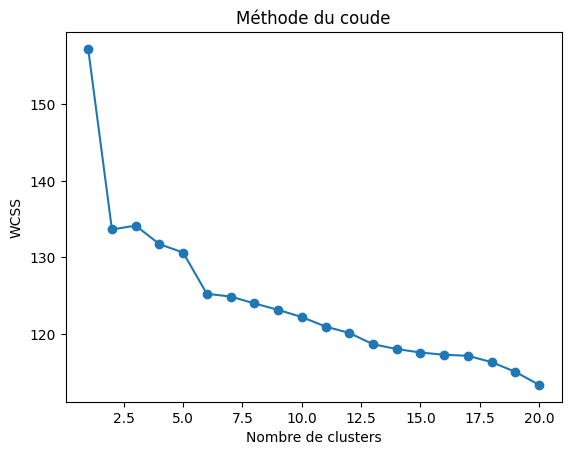

In [60]:
phrases_homme= rechercher_phrases_mots(bible_fini, 'homme')
print(len(phrases_homme))
data_homme = data_matrix(phrases_homme, wv)
elbow_method(20, data_homme)

On fait 6 clusters. 

In [67]:
cluster_homme, kmed_homme, data_homme = kmedoids(6, data_homme)
clust_homme, medoid_phrase_homme = reveal_cluster(cluster_homme, kmed_homme, phrases_homme)

In [68]:
print(medoid_phrase_homme)

["Deutéronome 17, 2 S'il se trouve au milieu de toi, dans l'une des villes que Yahvé ton Dieu t'aura données, un homme ou une femme qui fasse ce qui est mal aux yeux de Yahvé ton Dieu, en transgressant son alliance, Deutéronome 17, 3 qui aille servir d'autres dieux et se prosterner devant eux, et devant le soleil, la lune ou quelque autre de l'armée des cieux, ce que je n'ai pas commandé,  Deutéronome 17, 4 et qu'on te le dénonce; si, après l'avoir entendu et fait une bonne enquête, le fait est avéré et s'il est bien établi que cette chose abominable a été commise en Israël, Deutéronome 17, 5 tu feras sortir aux portes de ta ville cet homme ou cette femme coupable de cette mauvaise action, et tu lapideras cet homme ou cette femme jusqu'à ce que mort s'ensuive", 'femme 14, 5 "Mais avant d\'agir ainsi, appelez-moi Achior l\'Ammonite, pour qu\'il voie et reconnaisse le contempteur de la maison d\'Israël, celui qui l\'avait envoyé parmi nous comme un homme voué d\'avance à la mort', 'Il pr

In [69]:
print_all_cluster(cluster_homme, phrases_homme, 6)

[  2   9  29  34  36  37  64  65  71  74  78  89  92  93  94  96 119 125
 127 130 131 132 134 136 138 142 144 147 149 151 152 155 161 164 166 172
 183 186 189 190 196 199 226 237 259 290 291 318 327 341 353 369 373 415
 416 433 435 464 474 478 489 490 491 492 495 497 514 515 525 536 545 553
 554 555 559 560 598 610 618 623 661 667 696 697 699 709 716 724 730]
Cluster 0 :
Genèse 4, 23 Lamek dit à ses femmes: "Ada et Cilla, entendez ma voix, femmes de Lamek, écoutez ma parole: J'ai tué un homme pour une blessure, un enfant pour une meurtrissure
Genèse 34, 14 Ils leur dirent: "Nous ne pouvons pas faire une chose pareille: donner notre sœur à un homme incirconcis, car c'est un déshonneur chez nous
Exode 21, 14 Mais si un homme va jusqu'à en tuer un autre par ruse, tu l'arracheras même de mon autel pour qu'il soit mis à mort
Exode 30, 32 On n'en versera pas sur le corps d'un homme quelconque et vous n'en ferez pas de semblable, de même composition
"  Exode 36, 6 Moïse donna un ordre et l'on

On va regarder l'étude des biais sexistes dans le texte. 

In [159]:
#from analogy_FUNCTION import mat_etape_analogy, trouver_analogy, reveal_analogy

In [160]:
#sim_mat = mat_etape_analogy(wv, 'femme', 'homme') 

In [116]:
#indices_best, best_coefs = trouver_analogy(wv, sim_mat, 10)

In [117]:
#reveal_analogy(wv, indices_best, best_coefs)

[('narquois', 'chef', 0.6475564241409302),
 ('arbre', 'tobie', 0.621336817741394),
 ('charretier', 'responsabilites', 0.5475465059280396),
 ('criminel', 'epoque', 0.5838812589645386),
 ('flatteur', 'parabole', 0.5572157502174377),
 ('individu', 'communiquent', 0.5666621327400208),
 ('athee', 'saba', 0.5620330572128296),
 ('serrer', 'femme', 0.6377076506614685),
 ('clou', 'reconciliation', 0.5914633274078369),
 ('patures', 'femme', 0.6088795065879822)]

In [161]:
from geometry_gender_FUNCTION import diff_genre, dir_genre, biais_indirect
import numpy as np

In [178]:
#diff1 = diff_genre(wv, 'femme', 'homme')
#diff2 = diff_genre(wv, 'elle', 'il')
diff3 = diff_genre(wv, 'mere', 'pere')
diff4 = diff_genre(wv, 'fille', 'fils')
#diff5 = diff_genre(wv, 'feminin', 'masculin')
#diff6 = diff_genre(wv, 'femelle', 'male')
diff7 = diff_genre(wv, 'epoux', 'epouse')
#DIFF = np.array([diff1, diff2, diff3, diff4, diff5, diff6])
DIFF = np.array([diff3, diff4, diff7])

In [179]:
dir = dir_genre(wv, DIFF)

In [181]:
biais_indirect(wv, 'femme', 'prostituee', dir)

-0.038436979648210474